/var/folders/09/4yp7s_15433cpjv3k02m4hfm0000gn/T/ipykernel_25962/1657769362.py:12: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  per_minute = df.resample("10S").agg({


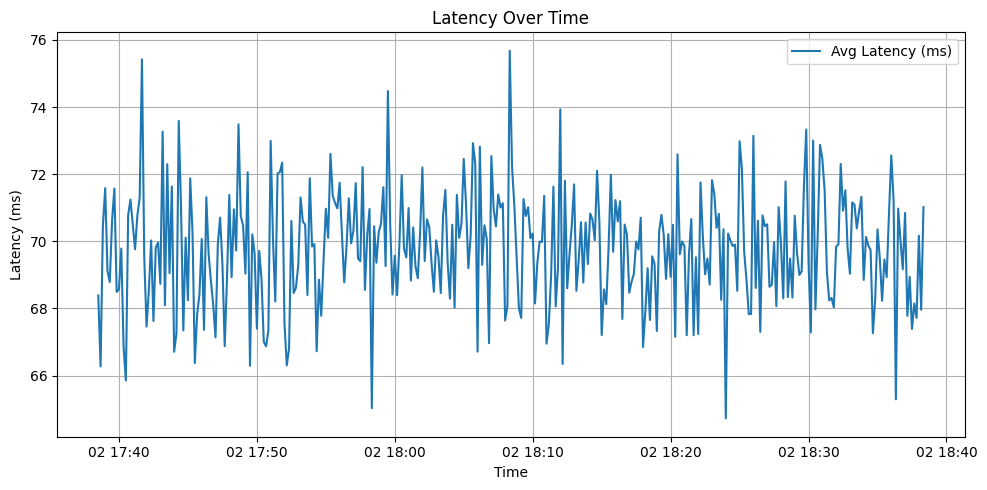

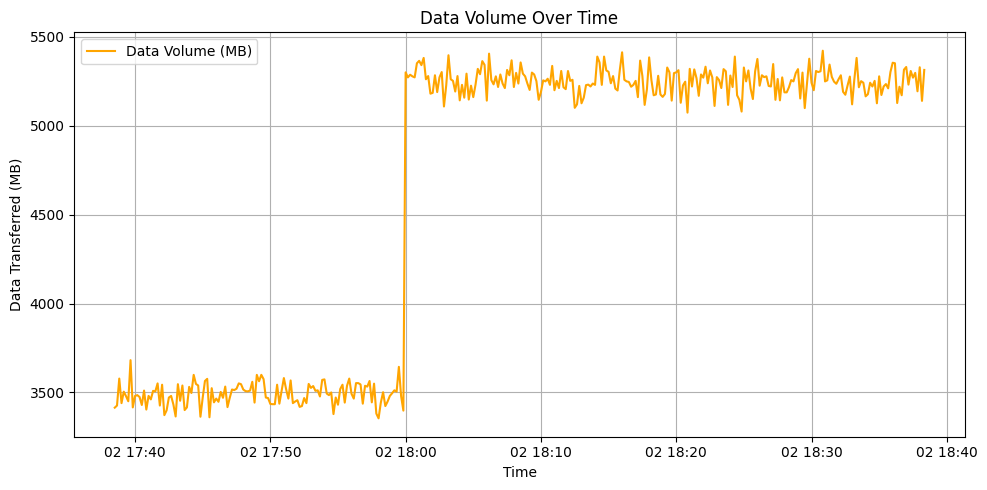

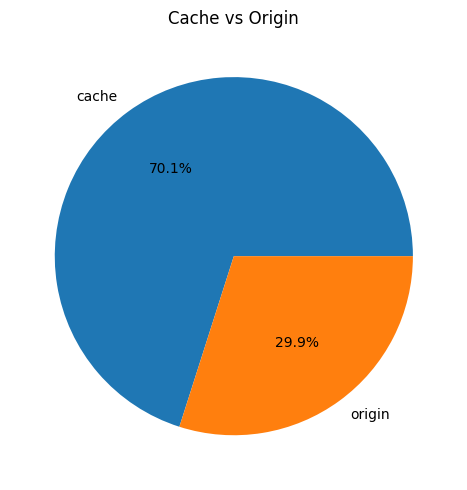

In [13]:
# simulate_and_visualize.py

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("output/cdn_requests.csv", parse_dates=['timestamp'])

# Group by time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
per_minute = df.resample("10S").agg({
    'latency_ms': 'mean',
    'data_mb': 'sum'
})

# Plot latency over time
plt.figure(figsize=(10, 5))
plt.plot(per_minute.index, per_minute['latency_ms'], label='Avg Latency (ms)')
plt.title("Latency Over Time")
plt.xlabel("Time")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot data volume over time
plt.figure(figsize=(10, 5))
plt.plot(per_minute.index, per_minute['data_mb'], color='orange', label='Data Volume (MB)')
plt.title("Data Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Data Transferred (MB)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Cache vs Origin breakdown
df['cache_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Cache vs Origin", figsize=(5, 5))
plt.ylabel("")
plt.tight_layout()
plt.show()
